# Lifetimes

In [1]:
# Arav Bhardwaj
# Comp Phys
# Mr. Payne
# 2023-02-23

<h3>Learning goals</h3>
<ul>
    <li>Relativistic kinematics.
    <li>Standard model particles.
    <li>Special Relativity.
</ul>

<b>Background</b>

Every type of particle has different characteristics. They each have different masses, lifetimes, decay methods and many other properties. 

To find the distance a particle travels in one lifetime, you need to know the lifetime of the particle and the speed of the particle. Classically, the formula to find the distance travelled in one lifetime is $ d= vt. $ Where $v$ is the speed of light and $t$ is the time the particle lives before it decays. 

However, in many particle physics experiments, the particles are moving close to (but always less than!) the speed of light and this means that they experience [time dilation](https://en.wikipedia.org/wiki/Time_dilation), which means their internal clocks run more slowly. 

Suppose a particle lives for the length of time equal to its [mean lifetime](http://hyperphysics.phy-astr.gsu.edu/hbase/nuclear/meanlif.html). This quantity is defined in the particle's rest frame, which means that the time that we measure in the lab (in our particle physics experiment) is generally longer. The really useful quantity we are looking for is the flight-length: the distance the particle travels between the time it is created and the time it decays. This flight-length is longer in the lab, because of the time dilation effect. The distance measured in the lab is the [mean free path](http://geant4.web.cern.ch/geant4/G4UsersDocuments/UsersGuides/PhysicsReferenceManual/html/node13.html) and is given by

$$d = \gamma \beta c \tau$$

where $\beta = v/c$ and $\gamma = \frac{1}{\sqrt{1-\beta^2}}$.

<b>Let's code!</b>

Here is a sample code that creates a table of the lifetime and distance traveled in one lifetime for three different particles, but the distance is calculated incorrectly. 

In [2]:
particles = ["B+/-","D+/-","J/Psi"]

lifetimes = [1.64e-12,1.4e-12,7e-21]

c = 3e8 # m/s

v = c

for p,l in zip(particles,lifetimes):
    distance = v*l
    print("%-5s  lifetime=%4.2f s     distance traveled=%4.2e m" % (p,l,distance))

B+/-   lifetime=0.00 s     distance traveled=4.92e-04 m
D+/-   lifetime=0.00 s     distance traveled=4.20e-04 m
J/Psi  lifetime=0.00 s     distance traveled=2.10e-12 m


<h3>Particles</h3>
<ul>
<li>$\mu^\pm$
    <li>$\tau^\pm$
    <li>$\pi^\pm$
    <li>$\pi^0$
    <li>$\rho^0$
    <li>$K^\pm$
    <li>$K^0_{\rm short}$
    <li>$K^0_{\rm long}$
    <li>$K^*(892)$
    <li>$D^\pm$
    <li>$B^\pm$
    <li>$B0$
    <li>$J/ \psi$
    <li>$\Upsilon(1S)$
    <li>proton
    <li>neutron
    <li>$\Delta^+$
    <li>$\Lambda^0$
    <li>$\Lambda_c$
</ul>

<h2><font color="red">Challenge!</font></h2>

Finish the table for every particle listed above with an output of the particle's name, the lifetime, the mass,  the momentum, and how far they travel in one lifetime assuming a momentum of 1 GeV/c, 10 GeV/c, and 100 GeV/c. You may need the following relativistic relationships. 

$$\vec{\beta} = \frac{\vec{pc}}{E} \qquad \qquad E^2 = (mc^2)^2 + (pc)^2$$

In [3]:
# Your code here
particle_names = ["muon +/-", "tau +/-", "pion +/-", "pion 0", "rho meson 0", "kaon +/-", "kaon 0 short", "kaon 0 long", "D Meson +/-" , "B Meson +/-", "Psion", "Upsilon 1S Meson", "Proton", "Neutron", "Delta Baryons +", "Lambda Baryon +", "Lambda Baryon C" ]
particle_masses = [105.6584, 1776.86, 139.5704, 134.9768, 775.4900, 493.677, 497.6110, 497.6110, 
        1869.62, 5279.3400, 3.0969e3, 9460.30, 938.2721, 939.5654, 1232, 1115.683, 2286 ] # MeV/c^2
particle_lifetimes = [2.1970e-6, 2.903e-13, 2.600e-8, 8.500e-17, 4.5e-24, 1.2380e-8, 8.954e-11, 5.116e-8, 
            1.040e-12, 1.638e-12, 7.2000e-21, 1.21e-20, 3.6e29*365*24*60*60, 879.400, 5.63e-24, 2.631e-10, 2e-13 ] # seconds

In [4]:
import math 
c = 3e8 # speed of light - m/s
momenta = [1e3, 10e3, 100e3] # given momenta converted to GeV/c

def calc_energy(mass, momentum):
    """ Calculates energy given mass and momentum according to equation """
    """ [Returns]: 1 float """
    return math.sqrt((mass*c**2)**2 + momentum**2)

def get_paths(mass, lifetime):
    """ Calculates travel distance given mass and lifetime according to equation for each momentum"""
    """ [Returns]: 3 floats """
    paths = [] # list to store paths
    for momentum in momenta:
        energy = calc_energy(mass, momentum) # calculate energy using helper func
        beta = (momentum*c) / energy # calculate beta
        gamma = 1/math.sqrt(1-beta**2) # calculate gamma
        path = gamma*beta*c*lifetime # put it all together to get path
        paths.append(path)
    return paths[0], paths[1], paths[2]

In [5]:
""" lists to store data """
lifetime_1GeVc = []
lifetime_10GeVc = []
lifetime_100GeVc = []

""" looping over masses and lifetimes to calculate path """
for mass, lifetime in zip(particle_masses, particle_lifetimes):
    l1, l2, l3 = get_paths(mass, lifetime)
    lifetime_1GeVc.append(l1)
    lifetime_10GeVc.append(l2)
    lifetime_100GeVc.append(l3)    

In [7]:
""" Creating a table """
import pandas as pd
data =  {
        "Particle": particle_names,
        "Mass": particle_masses,
        "Mean lifetime": particle_lifetimes,
        "Path - 1 GeVc": lifetime_1GeVc,
        "Path - 10 GeVc": lifetime_10GeVc,
        "Path - 100 GeVc": lifetime_100GeVc
        }
df = pd.DataFrame(data)

In [8]:
df

,Particle,Mass,Mean lifetime,Path - 1 GeVc,Path - 10 GeVc,Path - 100 GeVc
0,muon +/-,105.6584,2.197000e-06,2.079342e-05,2.079342e-04,2.079342e-03
1,tau +/-,1776.8600,2.903000e-13,1.633781e-13,1.633781e-12,1.633781e-11
2,pion +/-,139.5704,2.600000e-08,1.862859e-07,1.862859e-06,1.862859e-05
3,pion 0,134.9768,8.500000e-17,6.297379e-16,6.297379e-15,6.297379e-14
4,rho meson 0,775.4900,4.500000e-24,5.802783e-24,5.802783e-23,5.802783e-22
5,kaon +/-,493.6770,1.238000e-08,2.507713e-08,2.507713e-07,2.507713e-06
6,kaon 0 short,497.6110,8.954000e-11,1.799398e-10,1.799398e-09,1.799398e-08
7,kaon 0 long,497.6110,5.116000e-08,1.028112e-07,1.028112e-06,1.028112e-05
8,D Meson +/-,1869.6200,1.040000e-12,5.562628e-13,5.562628e-12,5.562628e-11
9,B Meson +/-,5279.3400,1.638000e-12,3.102661e-13,3.102661e-12,3.102661e-11


The scale of many modern physics detectors ranges from the order of centimeters to 10's of meters. Given that information, what particles do you think will actually live long enough to travel <i>through</i> parts of the detector?

In [9]:
# Your code here
cutoff = .01 # cutoff 
columns = ["Path - 1 GeVc", "Path - 10 GeVc", "Path - 100 GeVc"] # represents columns to check for cutoff

def detectable(row):
    """ Checks if the values in the columns above in a given row are greater than the cutoff """
    for column in columns:
        if row[column] > cutoff:
            return True
    return False
        
df["Detectable (10 m)"] = df.apply(lambda row: detectable(row), axis=1) # apply function to each row

In [10]:
df

,Particle,Mass,Mean lifetime,Path - 1 GeVc,Path - 10 GeVc,Path - 100 GeVc,Detectable (10 m)
0,muon +/-,105.6584,2.197000e-06,2.079342e-05,2.079342e-04,2.079342e-03,False
1,tau +/-,1776.8600,2.903000e-13,1.633781e-13,1.633781e-12,1.633781e-11,False
2,pion +/-,139.5704,2.600000e-08,1.862859e-07,1.862859e-06,1.862859e-05,False
3,pion 0,134.9768,8.500000e-17,6.297379e-16,6.297379e-15,6.297379e-14,False
4,rho meson 0,775.4900,4.500000e-24,5.802783e-24,5.802783e-23,5.802783e-22,False
5,kaon +/-,493.6770,1.238000e-08,2.507713e-08,2.507713e-07,2.507713e-06,False
6,kaon 0 short,497.6110,8.954000e-11,1.799398e-10,1.799398e-09,1.799398e-08,False
7,kaon 0 long,497.6110,5.116000e-08,1.028112e-07,1.028112e-06,1.028112e-05,False
8,D Meson +/-,1869.6200,1.040000e-12,5.562628e-13,5.562628e-12,5.562628e-11,False
9,B Meson +/-,5279.3400,1.638000e-12,3.102661e-13,3.102661e-12,3.102661e-11,False


Which particles will decay (on average) before they reach the detectors? This means that these particles have to be reconstructed from their decay products. 


In [44]:
# Your code here
decay_particles = list(df.loc[df['Detectable (10 m)'] == False]["Particle"]) # creates list of undetected particles 
print(decay_particles)

['muon +/-', 'tau +/-', 'pion +/-', 'pion 0', 'rho meson 0', 'kaon +/-', 'kaon 0 short', 'kaon 0 long', 'D Meson +/-', 'B Meson +/-', 'Psion', 'Upsilon 1S Meson', 'Delta Baryons +', 'Lambda Baryon +', 'Lambda Baryon C']


Make a plot where the x-axis is the names of the above particles (or a number corresponding to each, where the number/particle relationship is clearly identified) and the y-axis is the lifetime of the particle. Color code the data points according to whether the primary decay is EM, weak, or strong. {\it Do not plot the proton and neutron on this plot}. Do you see the "pattern"? You may need to use a log-scale for the y-axis. 

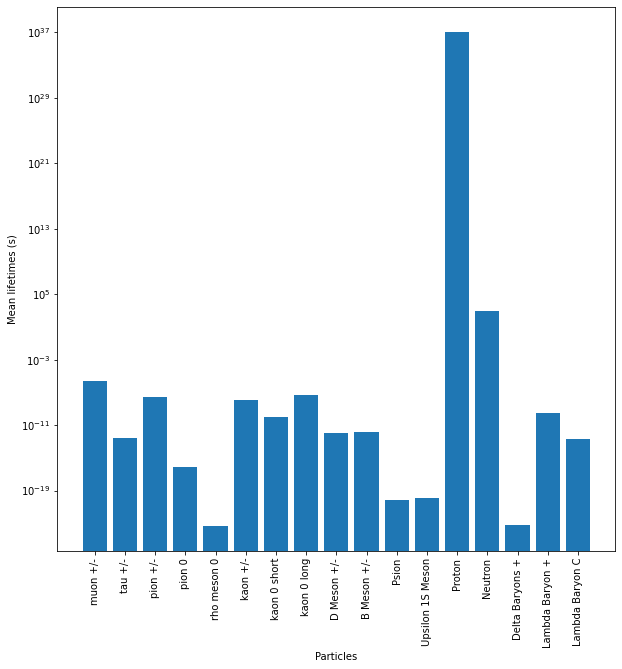

In [40]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10)) # increase plot size
plt.bar(particle_names, particle_lifetimes) # create bar graph
plt.yscale("log") # change y scale
plt.xticks(rotation=90) # rotate particle names on x-axis so they don't overlap
plt.xlabel("Particles")
plt.ylabel("Mean lifetimes (s)")
plt.show()
